### $\color{royalblue}{\text{ Уводна вјежба из нумеричких метода у астрономији, датум: 27.11.2025.}} $

**Студенти треба да инсталирају $\textit{anacondu}$.**

**Студенти треба да направе посебно окружење за овај предмет, на сопственим машинама.**

---

wget https://repo.anaconda.com/archive/Anaconda3-2024.07-1-Linux-x86_64.sh

bash Anaconda3-2024.07-1-Linux-x86_64.sh

source ~/.bashrc

conda create -n myenv python=3.11 # нпр.

conda activate myenv

---

<hr style="border: none; height: 2px; background-color: orange ; opacity: 0.5;" />

### $\color{orange}{\text{Кратак увод у python и неке основне операције.}} $



#### $\color{magenta}{\text{Креирање и чување фајла са подацима.}}$

Тзв. типови података за numpy дати су испод.

*Integer* → цијели број без децимала (нпр. 3, –10, 42);

*Float* → број са децималама или сл. (нпр. 3.14, –2.5, 1e6);

*Boolean* → логичка вриједност: True или False;

*String* → низ карактера који се користе као текст (нпр. "Sun", "astrophysics123").

In [27]:
import numpy as np

# Креирамо једноставан дводимензионални низ (нпр. магнитуде звијезда у различитим филтерима)
# Генеришемо насумичне апсолутне магнитуде, а затим израчунавамо привидне магнитуде на основу дистанце

broj_zvijezda = 50
ID = np.arange(1, broj_zvijezda + 1) 
print(ID)
distance = np.random.uniform(10, 1000, broj_zvijezda)  # у парсецима

# Генерисање апсолутних магнитуда (M) за U, B, V

abs_magnituda_U = np.random.uniform(-5, 5, broj_zvijezda)  
abs_magnituda_B = np.random.uniform(-5, 5, broj_zvijezda)  
abs_magnituda_V = np.random.uniform(-5, 5, broj_zvijezda)  

# Привидна магнитуда m

magnituda_U = abs_magnituda_U + 5 * np.log10(distance) - 5
magnituda_B = abs_magnituda_B + 5 * np.log10(distance) - 5
magnituda_V = abs_magnituda_V + 5 * np.log10(distance) - 5

podaci = np.column_stack((ID, distance, magnituda_U, magnituda_B, magnituda_V))
# podaci = np.stack((ID, distance, magnituda_U, magnituda_B, magnituda_V), axis=0)

# Чувамо податке у csv фајлу

formats = ['%d', '%.1f', '%.1f', '%.1f', '%.1f']

np.savetxt(
    'magnitude_zvijezda.csv',
    podaci,
    delimiter=',',
    header='ID, Distance, U, B, V',
    comments='',
    fmt=formats
)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


Формула коју смо користили у претходном дијелу је: $m = M + 5 \cdot \log_{10}(d_{pc}) - 5$.

Што се тиче numpy.random.uniform, расподјела вјероватноће је дата са: $p(x)=\frac{1}{b-a}$,

гдје су a i b границе изабраног интервала.

#### $\color{magenta}{\text{Учитавање података из горепоменутог фајла.}}$

In [75]:
# Учитавамо податке

ucitani_podaci = np.loadtxt('magnitude_zvijezda.csv', delimiter=',', skiprows=1)

# Приказујемо учитане податке

print("Учитани подаци из фајла 'magnitude_zvijezda.csv':")
print(ucitani_podaci)

Учитани подаци из фајла 'magnitude_zvijezda.csv':
[[ 1.000e+00  7.929e+02  1.350e+01  1.320e+01  5.200e+00]
 [ 2.000e+00  9.193e+02  6.300e+00  1.260e+01  5.500e+00]
 [ 3.000e+00  2.687e+02  7.700e+00  7.300e+00  1.030e+01]
 [ 4.000e+00  2.470e+02  4.300e+00  2.600e+00  4.900e+00]
 [ 5.000e+00  9.403e+02  1.160e+01  6.800e+00  5.000e+00]
 [ 6.000e+00  3.658e+02  4.900e+00  3.500e+00  1.080e+01]
 [ 7.000e+00  3.277e+02  9.800e+00  9.300e+00  7.400e+00]
 [ 8.000e+00  9.341e+02  8.700e+00  5.900e+00  7.500e+00]
 [ 9.000e+00  4.005e+02  4.400e+00  7.800e+00  9.100e+00]
 [ 1.000e+01  9.059e+02  1.400e+01  1.480e+01  8.900e+00]
 [ 1.100e+01  6.460e+02  1.160e+01  1.260e+01  9.200e+00]
 [ 1.200e+01  4.821e+02  1.160e+01  1.000e+01  4.600e+00]
 [ 1.300e+01  6.027e+02  8.400e+00  1.390e+01  9.900e+00]
 [ 1.400e+01  5.689e+02  6.300e+00  6.900e+00  6.800e+00]
 [ 1.500e+01  1.670e+01  1.100e+00  5.800e+00  2.500e+00]
 [ 1.600e+01  2.674e+02  8.400e+00  1.160e+01  9.800e+00]
 [ 1.700e+01  8.140e+0

#### $\color{magenta}{\text{Плотовање података и појединости графичког приказа.}}$

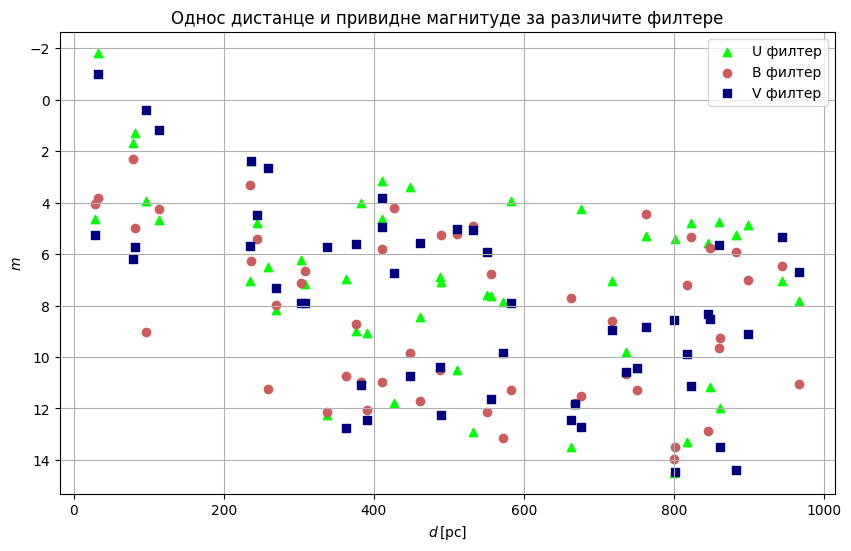

In [4]:
import matplotlib.pyplot as plt

# Плотовање односа дистанце и магнитуда

plt.figure(figsize=(10, 6))
plt.scatter(distance, magnituda_U, label='U филтер', color='lime', marker='^')
plt.scatter(distance, magnituda_B, label='B филтер', color='indianred', marker='o')
plt.scatter(distance, magnituda_V, label='V филтер', color='navy', marker='s')

# Додајемо наслове, легенду...

plt.title('Однос дистанце и привидне магнитуде за различите филтере')
plt.xlabel(r'$d\,\rm [pc]$')
plt.ylabel(r'$m$')
plt.gca().invert_yaxis()  # Инверзна скала за магнитуде
plt.legend()
plt.grid(True)
plt.show()

#### $\color{magenta}{\text{Приступ одређеним подацима из примјера.}}$

In [32]:
ucitani_podaci.shape

(50, 5)

In [33]:
print(ucitani_podaci[1, :])  # све информације о другој звијезди

[  2.  236.9   2.4   6.2   2.4]


In [34]:
print(ucitani_podaci[4, 3]) # B магнитуда пете звијезде

5.9


In [35]:
print(ucitani_podaci[:5, :]) # подаци за првих пет звијезда

[[  1.  859.9   4.8   9.7   5.6]
 [  2.  236.9   2.4   6.2   2.4]
 [  3.  861.6  12.    9.2  13.5]
 [  4.  376.4   9.    8.7   5.6]
 [  5.  882.    5.3   5.9  14.4]]


<hr style="border: none; height: 2px; background-color: orange; opacity: 0.5;" />

### $\color{orange}{\text{Низови у pythonu - уопштено.}} $

#### Ево примјера за неки дводимензионални низ.

In [8]:
# Подаци за астероиде: пречник [km], хелиоцентрична удаљеност [AU], брзина [km/s]

precnici = np.random.uniform(1, 100, 5)  # 5 астероида са пречницима између 1 и 100 km
udaljenosti = np.random.uniform(0.5, 5, 5)  # хелиоцентричне удаљености између 0.5 и 5 AU
brzine = np.random.uniform(5, 30, 5)  # брзине између 5 и 30 km/s

# Креирамо низ гдје сваки ред садржи податке о једном астероиду

asteroidi_2d = np.column_stack((precnici, udaljenosti, brzine))

print(asteroidi_2d.shape)
print(asteroidi_2d)

(5, 3)
[[25.94025875  3.79844758  8.8079559 ]
 [91.05414968  4.14669361 29.63552908]
 [ 6.05785221  4.83724399  6.85252956]
 [99.10218774  0.8372587   7.38411661]
 [89.52257935  4.55882386 21.4307705 ]]


#### Прелазимо на тродимензионални низ...

In [9]:
# Имамо 5 астероида као и раније, али су посматрани у 6 временских тренутака

broj_asteroida = 5
vremenski_trenutak = 6

precnici = np.random.uniform(1, 100, (vremenski_trenutak, broj_asteroida))
udaljenosti = np.random.uniform(0.5, 5, (vremenski_trenutak, broj_asteroida))
brzine = np.random.uniform(5, 30, (vremenski_trenutak, broj_asteroida))

# Сваки временски тренутак садржи дводимензионалне податке о астероидима (пречник, удаљеност, брзина)

asteroidi_3d = np.stack((precnici, udaljenosti, brzine), axis=2)

print(asteroidi_3d.shape)
print(asteroidi_3d)

(6, 5, 3)
[[[51.40754251  2.88529314 26.36427942]
  [ 6.40815689  3.79426388 19.49027195]
  [26.17853651  4.17429878 13.19200398]
  [74.08246539  4.73869269 29.99490737]
  [65.15492124  0.55473237 24.48407765]]

 [[18.61499332  2.58442714 23.47758426]
  [14.40848002  1.02780235 27.76186242]
  [16.91586623  2.94169433 22.71479461]
  [42.9168014   3.81067758  5.65028606]
  [40.22999059  2.54428619 17.26308635]]

 [[17.41953363  4.02011514 21.60867732]
  [19.01635585  1.28610643 23.43628148]
  [61.86520503  2.70315213 20.14208783]
  [ 8.94799407  2.54151944  7.31710758]
  [53.96075142  1.77054499 11.82516894]]

 [[10.29954656  0.60636103  7.55732009]
  [77.97167417  3.9127269   5.8232606 ]
  [69.56083078  1.65860929 17.4287265 ]
  [25.48671976  1.28604195 22.97255668]
  [30.92969296  2.34699432 25.23174138]]

 [[74.15114343  4.24794712 17.5369377 ]
  [41.88426192  2.50135628 15.52032856]
  [88.88403398  0.53516444 13.46391764]
  [93.73155149  1.2619468  27.24123812]
  [ 3.30386851  1.1621

#### Примјер - плотујемо брзине за свих пет астероида у другом временском тренутку.

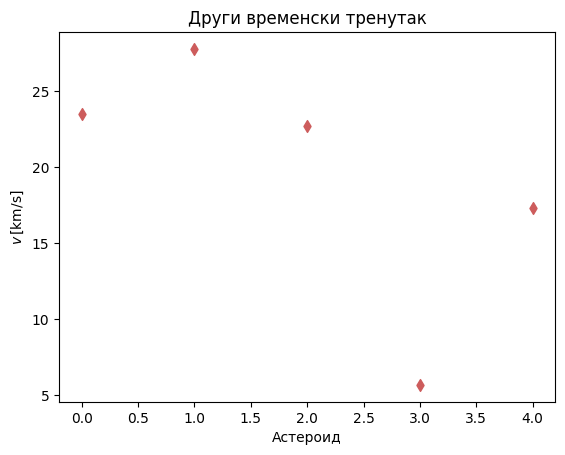

In [62]:
plt.scatter(range(asteroidi_3d.shape[1]), asteroidi_3d[1, :, 2], marker='d', color='indianred')
plt.xlabel('Астероид')
plt.ylabel(r'$v\,\rm [km/s]$')
plt.title('Други временски тренутак')
plt.grid(False)
plt.show()

#### Примјер - пишемо функцију која враћа суму првих $n$ чланова аритметичког низа.

Знамо да је први члан $a_1$, разлика $d$ и $n$ број чланова:

$$
S_n=\frac{n}{2}\cdot(2a_1+(n-1)\cdot d).
$$

In [76]:
def suma_aritmetickog_niza(a1, d, n):
    Sn = (n / 2) * (2 * a1 + (n - 1) * d)
    return Sn

a1 = 5
d = 1
n = 20

print(f'Сума првих {n} чланова аритемтичког низа је:', suma_aritmetickog_niza(a1, d, n))

Сума првих 20 чланова аритемтичког низа је: 290.0


<hr style="border: none; height: 2px; background-color: orange; opacity: 0.5;" />

### $\color{orange}{\text{Корисне ствари за интерпретацију статистике.}} $

11.928571428571429 14


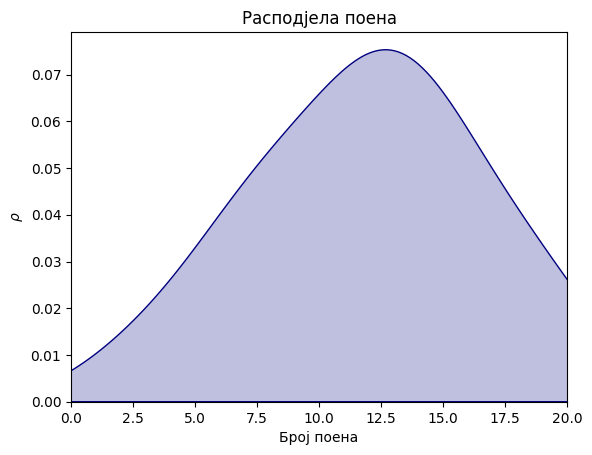

In [60]:
import seaborn as sns

poeni = [19, 19, 15, 15, 15, 13, 12, 12, 12, 10, 8, 7, 7, 3]
print(np.mean(poeni), len(poeni))

sns.kdeplot(poeni, fill=True, color='navy')
plt.xlim(0, 20)
plt.title('Расподјела поена')
plt.xlabel('Број поена')
plt.ylabel(r'$\rho$')
plt.show()

In [63]:
np.random.seed(42) # репродуцибилност

p_mat = np.random.normal(14, 3, 50)   # математика 
p_fiz = np.random.normal(12, 4, 50)   # физика
p_astro = np.random.normal(16, 2, 50) # астрономија

data = pd.DataFrame({
    'поени': np.concatenate([p_mat, p_fiz, p_astro]),
    'предмет': (['математика'] * 50 +
                ['физика'] * 50 +
                ['астрономија'] * 50)
})

print(data.shape)

(150, 2)


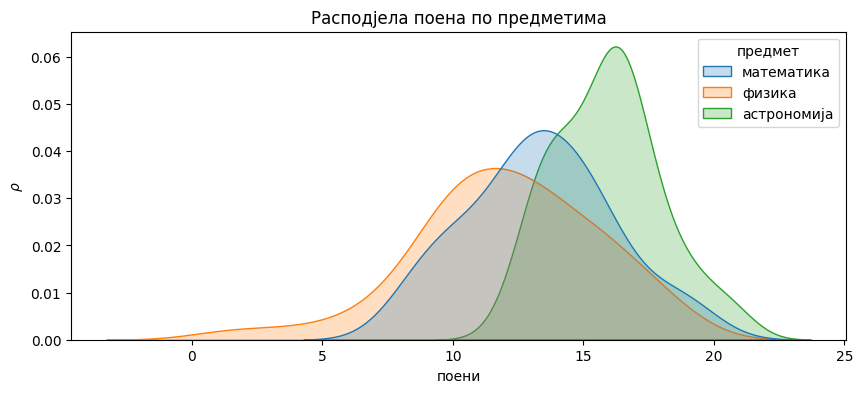

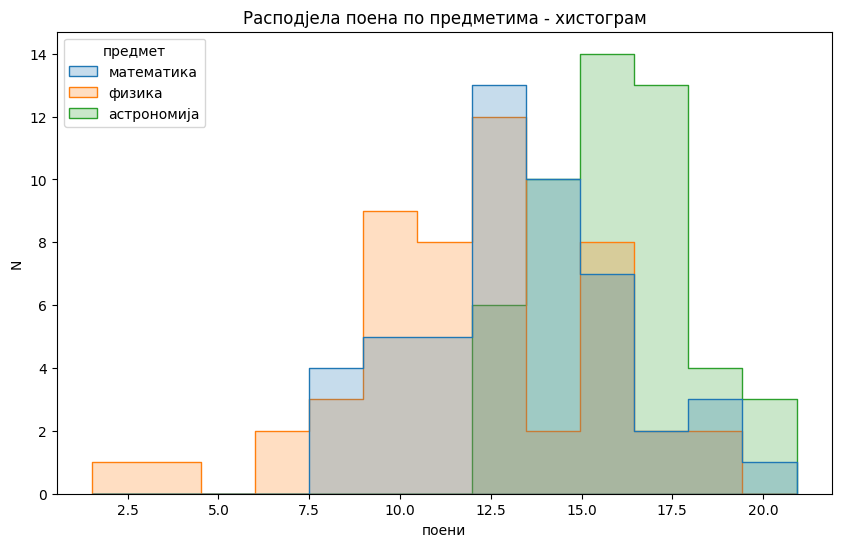

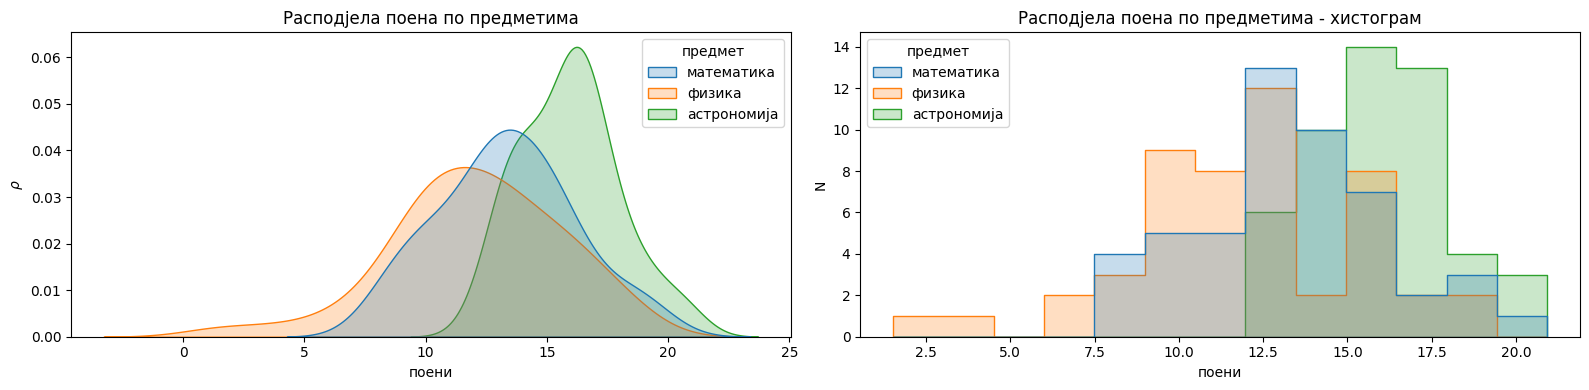

In [64]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=data, x='поени', hue='предмет', fill=True)
plt.ylabel(r'$\rho$')
plt.title('Расподјела поена по предметима')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data=data, x='поени', hue='предмет', kde=False, element='step')
plt.ylabel('N')
plt.title('Расподјела поена по предметима - хистограм')
plt.show()

# Другачије плотовање

plt.figure(figsize=(16,4))
plt.subplot(121)
sns.kdeplot(data=data, x='поени', hue='предмет', fill=True)
plt.ylabel(r'$\rho$')
plt.title('Расподјела поена по предметима')

plt.subplot(122)
sns.histplot(data=data, x='поени', hue='предмет', kde=False, element='step')
plt.ylabel('N')
plt.title('Расподјела поена по предметима - хистограм')

plt.tight_layout()
plt.show()

<hr style="border: none; height: 2px; background-color: orange; opacity: 0.5;" />

### $\color{orange}{\text{Петље.}} $

#### Примјер - промјена сјаја код остатка супернове.

$$
F=F_0e^{-kt}.
$$

In [69]:
vrijeme = np.arange(0, 500, 1)
pocetni_fluks = 1e5
stopa_opadanja = 0.07 

fluksevi = []
for t in vrijeme:
    fluks = pocetni_fluks * np.exp(-stopa_opadanja * t)
    fluksevi.append(fluks)

print(vrijeme[:10])
print(fluksevi[:10])

[0 1 2 3 4 5 6 7 8 9]
[100000.0, 93239.38199059483, 86935.82353988058, 81058.4245970187, 75578.37414557254, 70468.80897187135, 65704.68198150568, 61262.6394184416, 57120.906384881484, 53259.180100689715]


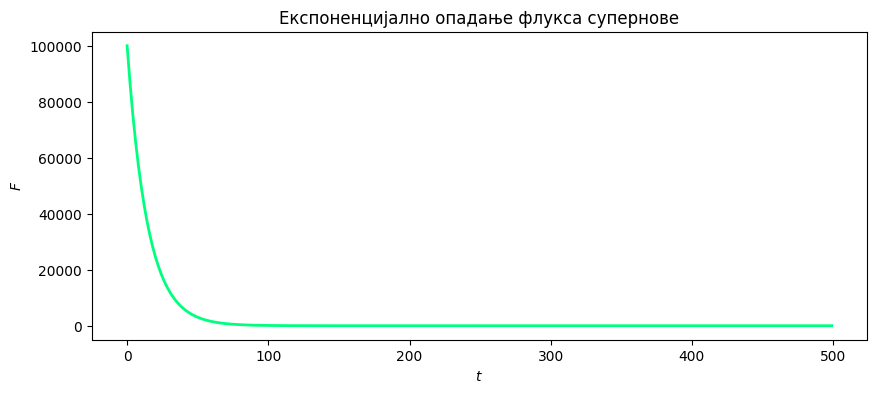

In [71]:
plt.figure(figsize=(10,4))
plt.plot(vrijeme, fluksevi,color='springgreen', linewidth=2)
plt.xlabel(r'$t$')
plt.ylabel(r'$F$')
plt.title('Експоненцијално опадање флукса супернове')
plt.show()

####  Примјер - једна пуна орбита неког тијела које се креће по елипси.


Радимо са поједностављеним случајем кад је $a(1-e^2)=1$:

$$
r(\theta) = \frac{1}{1 + e\cos\theta},\quad x=r\cos\theta, \quad y=r\sin\theta.
$$


In [81]:
theta = 0.0
dtheta = 0.02 # повећати корак
pos = []

while theta < 2 * np.pi:
    r = 1 / (1 + 0.3 * np.cos(theta)) # e=0.3
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    pos.append((x, y))
    theta += dtheta

print(len(pos))
print(pos[:5])
print(pos[1][1])


315
[(0.7692307692307692, 0.0), (0.7691124245183419, 0.015384299785039995), (0.7687573721779821, 0.030766705547294954), (0.7681655576218707, 0.04614532113708739), (0.7673368899417538, 0.06151824614988709)]
0.015384299785039995


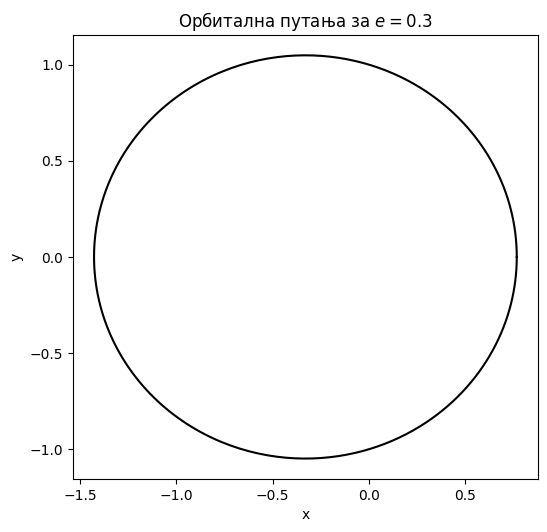

In [82]:
xs = [p[0] for p in pos]
ys = [p[1] for p in pos]

plt.figure(figsize=(6,6))
plt.plot(xs, ys, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Орбитална путања за $e = 0.3$')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### $\color{green}{\text{Задаци:}} $

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

1. Направити нумерички низ од 1 до 100 са кораком од 0.1; 

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

2. Направити нумерички низ од 1 до 100 (без 100) са 700 елемената; 

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

3. У монотоно растућем низу пронаћи све елементе који су већи од неке вриједности $a_1$ и мањи од неке вриједности $a_2$. 

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

4. У фајлу Atens.dat пронаћи све астероиде чија је велика полуоса између $0.8$ и $0.9$ АЈ и/или ексцентричност орбите

између $0.2$ и $0.3$.

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

### $\color{green}{\text{Рјешења.}} $

#### 1.

In [36]:
niz1 = np.arange(1, 100.1, 0.1)  # Почетак је 1, крај је 100.1 (како бисмо укључили 100), корак је 0.1
print(len(niz1))

991


#### 2.

In [38]:
niz2 = np.linspace(1, 100, 700, endpoint=False)  # endpoint=False искључује крајњу вриједност од 100
print(niz2[690:])
print(len(niz2))

[98.58571429 98.72714286 98.86857143 99.01       99.15142857 99.29285714
 99.43428571 99.57571429 99.71714286 99.85857143]
700


#### 3.

In [39]:
# Креирамо монотоно растући низ

monotoni_niz = np.arange(1, 301)  

# Дефинишемо границе

a1 = 30
a2 = 70

# Проналазимо све елементе како је тражено у задатку

selektovani_elementi = monotoni_niz[(monotoni_niz > a1) & (monotoni_niz < a2)]
print(selektovani_elementi)

[31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]


#### 4.

In [84]:
import pandas as pd # корисно за манипулисање подацима

a_min = 0.8
a_max = 0.9
e_min = 0.2
e_max = 0.3

asteroidi = pd.read_csv('Atens.dat', delim_whitespace=True)

# услов "и"

asteroidi_1 = asteroidi[(asteroidi['a'] > a_min) & 
                        (asteroidi['a'] < a_max) & (asteroidi['e'] > e_min)
                        & (asteroidi['e'] < e_max)] 

# услов "или"

asteroidi_2 = asteroidi[(asteroidi['a'] > a_min) & 
                        (asteroidi['a'] < a_max) | (asteroidi['e'] > e_min)
                        & (asteroidi['e'] < e_max)]

print('Укупан број астероида је:', len(asteroidi))
print('Број астероида чија је велика полуоса између 0.8 и 0.9 АЈ и/или ексцентрицитет између 0.2 и 0.3')
print(len(asteroidi_1), len(asteroidi_2))

Укупан број астероида је: 684
Број астероида чија је велика полуоса између 0.8 и 0.9 АЈ и/или ексцентрицитет између 0.2 и 0.3
79 309


/tmp/ipykernel_114539/2072382490.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  asteroidi = pd.read_csv('Atens.dat', delim_whitespace=True)
